In [179]:
import os

os.sys.path.append(os.path.abspath('../src'))
from data import loader

import matplotlib.pyplot as plt
import pandas as pd

# Loading UAH-Driveset

The loader will concatenate all the normal and the aggressive drivers into a single dataframe

In [138]:
drivers = ['D1', 'D2', 'D3', 'D4', 'D5'] # List of drivers to load
uah = loader.read_data(drivers, os.path.abspath('../data/base/UAH-DRIVESET-v1'))
print(f"Loaded data for {len(drivers)} drivers.")
print(f"Sample rate in accelerometer data: {loader.get_samples_per_second(uah['acc'])} Hz")
print(f"Sample rate in GPS data: {loader.get_samples_per_second(uah['gps'])} Hz")

Loaded data for 5 drivers.
Sample rate in accelerometer data: 11.111111111111128 Hz
Sample rate in GPS data: 1.0204081632653057 Hz


In [ ]:
uah['acc']['normal'].head()

,acc_x,acc_y,acc_z,acc_x_KF,acc_y_KF,acc_z_KF,Roll,Pitch,Yaw,acc
timestamp,,,,,,,,,,
6.94,0.017,-0.011,0.018,-0.005,0.008,0.018,-1.523,0.015,0.012,0.027092
7.03,0.046,0.007,0.019,0.016,-0.002,0.018,-1.522,0.012,0.012,0.050259
7.14,0.052,-0.016,0.027,0.037,-0.005,0.018,-1.520,0.014,0.011,0.060737
7.24,0.015,-0.016,0.026,0.038,-0.009,0.024,-1.523,0.014,0.011,0.034015
7.34,-0.014,-0.017,0.040,0.012,-0.016,0.032,-1.525,0.012,0.011,0.045662


In [141]:
uah['gps']['normal'].head()

,timestamp,speed,lat,lon,altitude,vert_accuracy,horiz_accuracy,course,difcourse
0,7.85,65.2,40.512787,-3.404477,612.7,4,5,331.9,0.000
1,8.83,64.5,40.512924,-3.404577,612.5,4,5,331.9,0.000
2,9.82,63.6,40.513065,-3.404680,612.9,4,5,330.8,1.055
3,10.80,62.2,40.513210,-3.404772,613.3,4,5,330.8,1.055
4,11.80,60.9,40.513348,-3.404868,613.5,3,5,330.1,0.703


# Loading Synthetic Data

In [163]:
data = {}
carla_data, sumo_data = loader.load_synthetic_data(os.path.abspath('../data/synthetic/Town01'))

data['carla'] = carla_data
data['sumo'] = sumo_data

In [164]:
sumo_data['fixed']['traffic']['normal'].head()

,timestamp,x_pos,y_pos,speed,speed_x,speed_y,acc,acc_x,acc_y,angle,acc_diff,gyro_z
0,0.1,158.087185,287.510000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.080721,0.000000,0.0
1,0.2,158.087187,287.511433,0.014326,0.014326,0.000020,0.143256,0.143256,0.000202,0.080721,1.432562,0.0
2,0.3,158.087193,287.515512,0.040790,0.040790,0.000057,0.264642,0.264642,0.000373,0.080721,0.264642,0.0
3,0.4,158.087205,287.524275,0.087632,0.087632,0.000123,0.468422,0.468421,0.000660,0.080721,2.037796,0.0
4,0.5,158.087228,287.540785,0.165100,0.165100,0.000233,0.774677,0.774676,0.001091,0.080721,3.062549,0.0


In [165]:
carla_data['fixed']['traffic']['normal'].head()

,timestamp,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,compass,latitude,longitude
0,0.0,0.000000,0.00000,11.703546,-7.070132e-08,7.270698e-07,-2.273888e-10,270.006121,-0.002935,0.00208
1,0.1,0.000000,0.00000,10.181377,-6.711268e-07,6.587454e-07,-3.054257e-11,270.006121,-0.002935,0.00208
2,0.2,0.000000,0.00000,9.807656,8.688633e-07,3.080302e-07,1.097388e-10,270.006121,-0.002935,0.00208
3,0.3,0.000000,0.00000,9.750303,6.878911e-07,-2.199771e-07,-1.421593e-10,270.006121,-0.002935,0.00208
4,0.4,0.618891,0.01251,9.762725,8.020669e-04,-7.295853e-03,6.547187e-03,270.012568,-0.002935,0.00208


In [145]:
def print_tree(d, prefix=''):
    """Recursively print a nested dictionary as an ASCII tree."""
    total = len(d)
    for i, (key, value) in enumerate(d.items()):
        is_last = i == total - 1
        branch = '└── ' if is_last else '├── '
        print(prefix + branch + str(key))

        new_prefix = prefix + ('    ' if is_last else '│   ')
        
        if isinstance(value, dict):
            print_tree(value, new_prefix)
        else:
            print(new_prefix + f'└── # samples: {len(value)}')

In [146]:
print_tree(data)

├── carla
│   ├── fixed
│   │   ├── no_traffic
│   │   │   ├── normal
│   │   │   │   └── # samples: 1443
│   │   │   └── aggressive
│   │   │       └── # samples: 1443
│   │   └── traffic
│   │       ├── normal
│   │       │   └── # samples: 1443
│   │       └── aggressive
│   │           └── # samples: 1443
│   └── llm
│       ├── no_traffic
│       └── traffic
└── sumo
    ├── fixed
    │   ├── no_traffic
    │   │   ├── normal
    │   │   │   └── # samples: 18858
    │   │   └── aggressive
    │   │       └── # samples: 9381
    │   └── traffic
    │       ├── normal
    │       │   └── # samples: 9590
    │       └── aggressive
    │           └── # samples: 9561
    └── llm
        ├── no_traffic
        │   └── aggressive
        │       └── # samples: 10365
        └── traffic
            └── aggressive
                └── # samples: 10060


# Merging Datasets

Aside from training and testing only with Real and Synthetic data, we are also going to merge it in the following manner for fixed and LLM parameters:
- Real + SUMO
- Real + CARLA
- Real + SUMO + CARLA

The no_traffic version has been left out, since we want to test the simulators to their limits. 

In [147]:
print("CARLA sensors:", carla_data['fixed']['traffic']['normal'].keys().tolist())
print("SUMO sensors:", sumo_data['fixed']['traffic']['normal'].keys().tolist())
print("UAH-DRIVESET sensors:", uah['acc']['normal'].keys().tolist(), uah['gps']['normal'].keys().tolist())

CARLA sensors: ['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z', 'compass', 'latitude', 'longitude']
SUMO sensors: ['x_pos', 'y_pos', 'speed', 'speed_x', 'speed_y', 'acc', 'acc_x', 'acc_y', 'angle', 'acc_diff', 'gyro_z']
UAH-DRIVESET sensors: ['timestamp', 'acc_x', 'acc_y', 'acc_z', 'acc_x_KF', 'acc_y_KF', 'acc_z_KF', 'Roll', 'Pitch', 'Yaw', 'acc'] ['timestamp', 'speed', 'lat', 'lon', 'altitude', 'vert_accuracy', 'horiz_accuracy', 'course', 'difcourse']


First, we need to define how the merging is going to take place, since we are looking at different sensors, based on the UAH-Driveset.

The most importants are `acc`, `gyro` (row, pitch and yaw), `speed` and `course` (compass / angle).

To merge with CARLA data, we can keep `acc`, `gyro` and `course`.

To merge with SUMO data, we can keep `acc`, `speed` and `course` 

To merge with CARLA and SUMO, we can only keep `acc` and `course`.

## Merging UAH's IMU and GNSS

First, we need to merge the two datasets in distinct frequencies. For that, we merge the acceleration with the gps using the nearset timestamp value.

In [154]:
merged_normal_uah = pd.merge_asof(uah['acc']['normal'], uah['gps']['normal'], on='timestamp', direction='nearest', suffixes=('_acc', '_gps'))
merged_aggressive_uah = pd.merge_asof(uah['acc']['aggressive'], uah['gps']['aggressive'], on='timestamp', direction='nearest', suffixes=('_acc', '_gps'))

In [155]:
merged_normal_uah.head()

,timestamp,acc_x,acc_y,acc_z,acc_x_KF,acc_y_KF,acc_z_KF,Roll,Pitch,Yaw,acc,speed,lat,lon,altitude,vert_accuracy,horiz_accuracy,course,difcourse
0,6.94,0.017,-0.011,0.018,-0.005,0.008,0.018,-1.523,0.015,0.012,0.027092,65.2,40.512787,-3.404477,612.7,4,5,331.9,0.0
1,7.03,0.046,0.007,0.019,0.016,-0.002,0.018,-1.522,0.012,0.012,0.050259,65.2,40.512787,-3.404477,612.7,4,5,331.9,0.0
2,7.14,0.052,-0.016,0.027,0.037,-0.005,0.018,-1.520,0.014,0.011,0.060737,65.2,40.512787,-3.404477,612.7,4,5,331.9,0.0
3,7.24,0.015,-0.016,0.026,0.038,-0.009,0.024,-1.523,0.014,0.011,0.034015,65.2,40.512787,-3.404477,612.7,4,5,331.9,0.0
4,7.34,-0.014,-0.017,0.040,0.012,-0.016,0.032,-1.525,0.012,0.011,0.045662,65.2,40.512787,-3.404477,612.7,4,5,331.9,0.0


## Fixed Parameters

In [ ]:

def plot_side_by_side(df1, df2, columns, xlims, titles=('Dataset 1', 'Dataset 2'), figsize=(12, 4)):

    fig, axes = plt.subplots(1, 2, figsize=figsize)
    for i, (df, ax, title) in enumerate(zip([df1, df2], axes, titles)):
        df[columns].plot(ax=ax)
        ax.set_title(title)
        ax.set_xlabel('Index')
        ax.set_ylabel('Value')
        ax.legend(columns)
    # Set shared x/y limits
    ylims = [min(ax.get_ylim()[0] for ax in axes), max(ax.get_ylim()[1] for ax in axes)]
    for ax in axes:
        ax.set_xlim(xlims)
        ax.set_ylim(ylims)
    plt.tight_layout()
    plt.show()

In [182]:
# Note that acc are 10 Hz and angle/speed are 1 Hz in UAH-DRIVESET
merged_sumo_columns = ['acc_x', 'acc_y', 'angle', 'speed']

sumo_fixed_normal_data = sumo_data['fixed']['traffic']['normal'][merged_sumo_columns]
sumo_fixed_aggressive_data = sumo_data['fixed']['traffic']['aggressive'][merged_sumo_columns]
uah_normal_data = merged_normal_uah[['acc_x', 'acc_y', 'course', 'speed']].rename(columns={'course': 'angle'})
uah_aggressive_data = merged_aggressive_uah[['acc_x', 'acc_y', 'course', 'speed']].rename(columns={'course': 'angle'})

print("UAH columns:", uah_normal_data.columns.tolist())
print("SUMO columns:", sumo_fixed_normal_data.columns.tolist())

UAH columns: ['acc_x', 'acc_y', 'angle', 'speed']
SUMO columns: ['acc_x', 'acc_y', 'angle', 'speed']


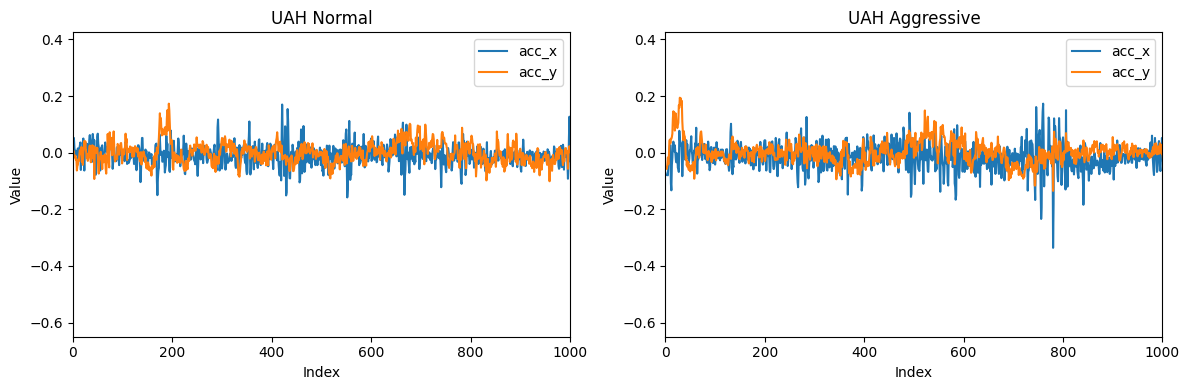

In [181]:
plot_side_by_side(uah_normal_data, uah_aggressive_data, columns=['acc_x', 'acc_y'], xlims=[0, 1000], titles=('UAH Normal', 'UAH Aggressive'))

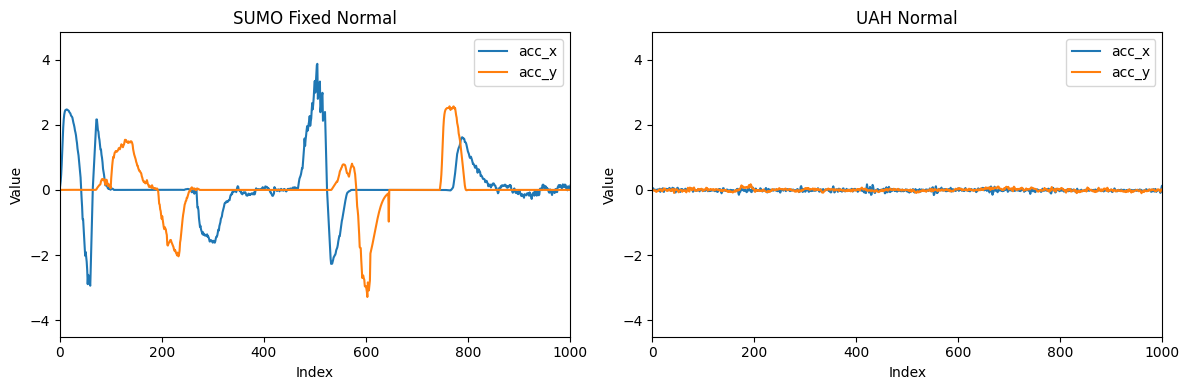

In [178]:
plot_side_by_side(sumo_fixed_normal_data, uah_normal_data, columns=['acc_x', 'acc_y'], xlims=[0, 1000], titles=('SUMO Fixed Normal', 'UAH Normal'))

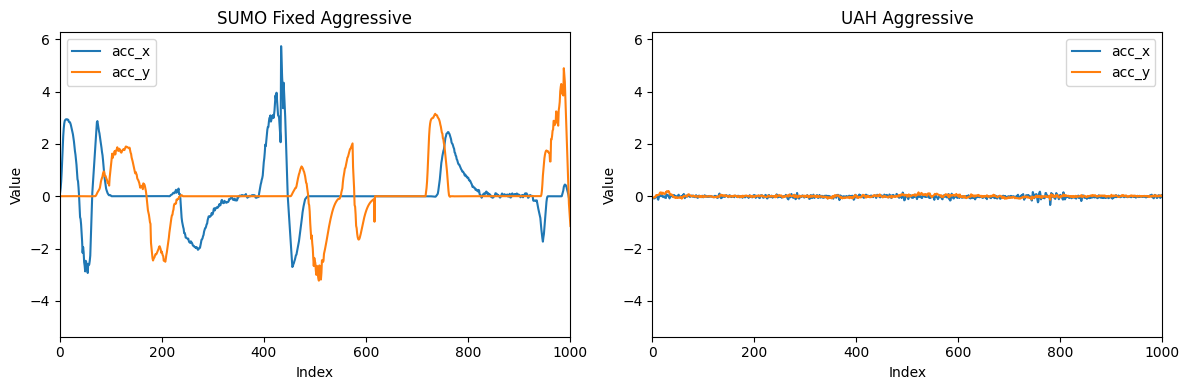

In [180]:
plot_side_by_side(sumo_fixed_aggressive_data, uah_aggressive_data, columns=['acc_x', 'acc_y'], xlims=[0, 1000], titles=('SUMO Fixed Aggressive', 'UAH Aggressive'))